# EDA and Analysis of Cell Labels


## Setup libraries and data

In [1]:
#Connect to Google Drive to connect to our data. If you store data elsewhere, this cell is not needed.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#Pip install for plotting purposes
!pip install scikit-plot

In [3]:
#Install libraries
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scikitplot as skplt
from PIL import Image
import os
import skimage
from skimage import io

## Opening Sample Images with Various Imaging Methods

### Use Image from PIL to Open Sample Image

In [4]:
#Sample image
image_path = '/content/gdrive/MyDrive/PKG_AML_Cytomorphology/AML_Cytomorphology/BAS/BAS_0002.tiff'

In [5]:
#open image 
im = Image.open(image_path)

In [6]:
#Not a numpy array - this is the image. 
print(type(im))

<class 'PIL.TiffImagePlugin.TiffImageFile'>


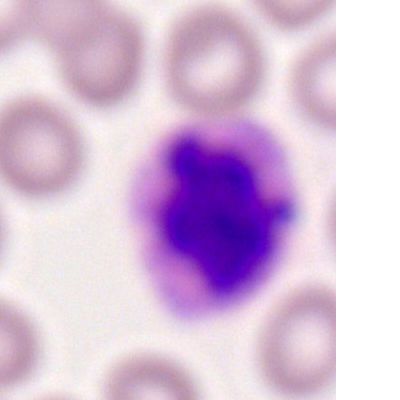

In [7]:
#look at the image
im

### Use Gdal to Open Another Sample Image

In [8]:
#Second sample image
dataset = gdal.Open(r'/content/gdrive/MyDrive/PKG_AML_Cytomorphology/AML_Cytomorphology/BAS/BAS_0003.tiff')

In [9]:
#Print raster count. The raster count is 4 meaning there is an extra dimension besides the 3 colors RGB. We did a separate analysis and discovered this 4th band
#is unimportant and does contain any extra information. 
print(dataset.RasterCount)

4


In [10]:
# since there are 3 bands
# we store in 3 different variables
band1 = dataset.GetRasterBand(1) # Red channel
band2 = dataset.GetRasterBand(2) # Green channel
band3 = dataset.GetRasterBand(3) # Blue channel
band4 = dataset.GetRasterBand(4)

In [11]:
#Read in the bands
b1 = band1.ReadAsArray()
b2 = band2.ReadAsArray()
b3 = band3.ReadAsArray()
b4 = band4.ReadAsArray()

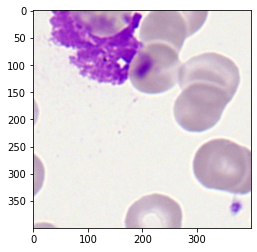

In [12]:
#Look at the sample image
img1 = np.dstack((b1, b2, b3))
f = plt.figure()
plt.imshow(img1)
plt.show()

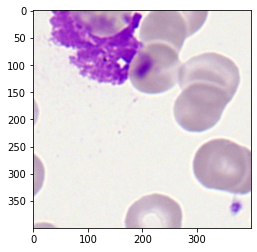

In [13]:
#Add 4th band to show image does not change
img = np.dstack((b1, b2, b3,b4))
f = plt.figure()
plt.imshow(img)
plt.show()

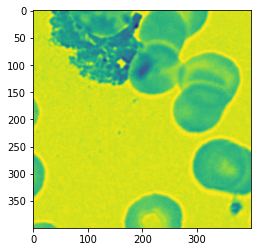

In [14]:
#Look at red channel by itself
plt.imshow(b1)

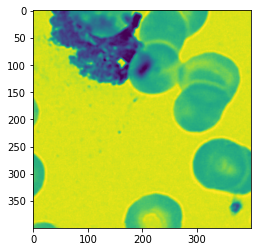

In [15]:
#Look at green channel by itself
plt.imshow(b2)

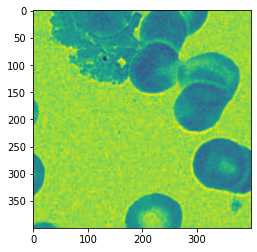

In [16]:
#Look at blue channel by itself
plt.imshow(b3)

###Use Scikit Image to Open Third Sample Image

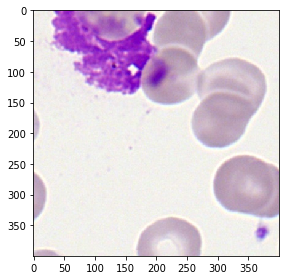

In [17]:
third_test = io.imread('/content/gdrive/MyDrive/PKG_AML_Cytomorphology/AML_Cytomorphology/BAS/BAS_0003.tiff')
  
# way to show the input image
io.imshow(third_test)
io.show()

## Cell Labels Analysis

In [18]:
#classes dictionary copied from TCIA page and then reversed so keys becomes values
classes_dictionary_org = {'BAS':0, 'EBO':1, 'EOS':2, 'KSC':3, 'LYA':4, 'LYT':5, 'MMZ':6, 'MOB':7, 'MON':8, 'MYB':9, 'MYO':10, 'NGB':11, 'NGS':12, 'PMB':13, 'PMO':14 }
classes_dictionary = {value: key for key, value in classes_dictionary_org.items()}

In [19]:
classes_dictionary

{0: 'BAS',
 1: 'EBO',
 2: 'EOS',
 3: 'KSC',
 4: 'LYA',
 5: 'LYT',
 6: 'MMZ',
 7: 'MOB',
 8: 'MON',
 9: 'MYB',
 10: 'MYO',
 11: 'NGB',
 12: 'NGS',
 13: 'PMB',
 14: 'PMO'}

In [20]:
#Full names of cells and abbreviations
abbreviation_dict = { 'NGS':'Neutrophil (segmented)', 
                      'NGB':
                      'Neutrophil (band)',
                      'EOS':'Eosinophil',
                      'BAS':'Basophil',
                      'MON':'Monocyte',
                      'LYT':'Lymphocyte (typical)',
                      'LYA':'Lymphocyte (atypical)',
                      'KSC':'Smudge Cell',
                      'MYO':'Myeloblast',
                      'PMO':'Promyelocyte',
                      'MYB':'Myelocyte',
                      'MMZ':'Metamyelocyte',
                      'MOB':'Monoblast',
                      'EBO':'Erythroblast',
                      'PMB':'Promyelocyte (bilobed)'};

In [21]:
#Look at just the cell abbreviations
just_labels = abbreviation_dict.keys()
just_labels

dict_keys(['NGS', 'NGB', 'EOS', 'BAS', 'MON', 'LYT', 'LYA', 'KSC', 'MYO', 'PMO', 'MYB', 'MMZ', 'MOB', 'EBO', 'PMB'])

In [22]:
#My dictionary to count cells by cell type
mydict = {}
for (root,dirs,files) in os.walk('/content/gdrive/MyDrive/PKG_AML_Cytomorphology/AML_Cytomorphology', topdown=False):
    if len(files)>0:
        mydict[root[-3:]]=len(files)
print(mydict)

{'EOS': 424, 'EBO': 78, 'LYT': 3937, 'MYB': 42, 'PMB': 18, 'BAS': 79, 'MOB': 26, 'LYA': 11, 'NGS': 8484, 'MMZ': 15, 'MYO': 3268, 'PMO': 70, 'MON': 1789, 'NGB': 109, 'KSC': 15}


In [23]:
#number of classes - check to see if it matches the number in paper. 15 so it does.
len(mydict)

15

In [24]:
#number of pics - 18,365 which is what it's supposed to be. 
sum(mydict.values())

18365

In [25]:
#Read in the official image labels from the annotations file
labels = pd.read_csv('/content/gdrive/MyDrive/annotations.dat', header = None, sep = " ", names = ['filename', 'label_1', 'label_2', 'label_3'])

In [26]:
#Look at table
labels

,filename,label_1,label_2,label_3
0,BAS/BAS_0001.tiff,BAS,NaN,NaN
1,BAS/BAS_0002.tiff,BAS,NaN,NaN
2,BAS/BAS_0003.tiff,BAS,NaN,NaN
3,BAS/BAS_0004.tiff,BAS,NaN,NaN
4,BAS/BAS_0005.tiff,BAS,NaN,NaN
...,...,...,...,...
18360,PMO/PMO_0066.tiff,PMO,NaN,NaN
18361,PMO/PMO_0067.tiff,PMO,NaN,NaN
18362,PMO/PMO_0068.tiff,PMO,NaN,NaN
18363,PMO/PMO_0069.tiff,PMO,NaN,NaN


In [27]:
#Split the filename column into just the filename without parent directory and make parent directory the cell type
labels[['cell_type','filename']] = labels.filename.str.split(pat = "/",expand=True)
labels

,filename,label_1,label_2,label_3,cell_type
0,BAS_0001.tiff,BAS,NaN,NaN,BAS
1,BAS_0002.tiff,BAS,NaN,NaN,BAS
2,BAS_0003.tiff,BAS,NaN,NaN,BAS
3,BAS_0004.tiff,BAS,NaN,NaN,BAS
4,BAS_0005.tiff,BAS,NaN,NaN,BAS
...,...,...,...,...,...
18360,PMO_0066.tiff,PMO,NaN,NaN,PMO
18361,PMO_0067.tiff,PMO,NaN,NaN,PMO
18362,PMO_0068.tiff,PMO,NaN,NaN,PMO
18363,PMO_0069.tiff,PMO,NaN,NaN,PMO


In [28]:
#create an empty dictionary so we can keep counts of types of cells from official annotations
official_count = {key: 0 for key in just_labels}
print(official_count)

{'NGS': 0, 'NGB': 0, 'EOS': 0, 'BAS': 0, 'MON': 0, 'LYT': 0, 'LYA': 0, 'KSC': 0, 'MYO': 0, 'PMO': 0, 'MYB': 0, 'MMZ': 0, 'MOB': 0, 'EBO': 0, 'PMB': 0}


In [29]:
#create an array of all cells
cells = np.array(labels['label_1'])
len(cells)

18365

In [30]:
#Add each cell to the official count dictionary 
for cell in cells:
  official_count[cell] +=1 

In [31]:
#Look at official counts of cells
official_count

{'BAS': 79,
 'EBO': 78,
 'EOS': 424,
 'KSC': 15,
 'LYA': 11,
 'LYT': 3937,
 'MMZ': 15,
 'MOB': 26,
 'MON': 1789,
 'MYB': 42,
 'MYO': 3268,
 'NGB': 109,
 'NGS': 8484,
 'PMB': 18,
 'PMO': 70}

In [32]:
mydict

{'BAS': 79,
 'EBO': 78,
 'EOS': 424,
 'KSC': 15,
 'LYA': 11,
 'LYT': 3937,
 'MMZ': 15,
 'MOB': 26,
 'MON': 1789,
 'MYB': 42,
 'MYO': 3268,
 'NGB': 109,
 'NGS': 8484,
 'PMB': 18,
 'PMO': 70}

In [33]:
#all gold standard labels match cell type folders - no mismatch. Just checking to make sure data is clean.
labels[labels['label_1'] != labels['cell_type']]

,filename,label_1,label_2,label_3,cell_type


In [34]:
#Sort abbreviations in descending order
sorted_new_abbrevs = sorted(mydict.items(), key=lambda item: item[1], reverse = True)
sorted_new_abbrevs

[('NGS', 8484),
 ('LYT', 3937),
 ('MYO', 3268),
 ('MON', 1789),
 ('EOS', 424),
 ('NGB', 109),
 ('BAS', 79),
 ('EBO', 78),
 ('PMO', 70),
 ('MYB', 42),
 ('MOB', 26),
 ('PMB', 18),
 ('MMZ', 15),
 ('KSC', 15),
 ('LYA', 11)]

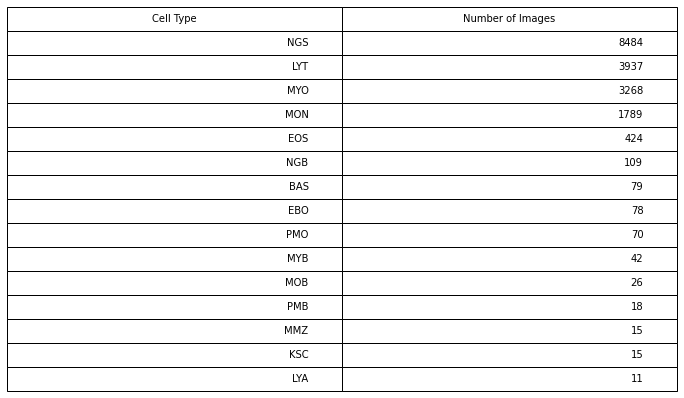

In [35]:
#Make table of cell abbreviations and counts
table = plt.table(cellText = sorted_new_abbrevs, 
                      colLabels = ['Cell Type', 'Number of Images'],
                      loc='center')
plt.axis("off")
table.scale(2,2)
plt.show()

In [36]:
#Make dictionary with full name of cells with corresponding counts
dict_new_names = {}
for key,value in abbreviation_dict.items():
  dict_new_names[value] =  mydict[key]
dict_new_names

{'Basophil': 79,
 'Eosinophil': 424,
 'Erythroblast': 78,
 'Lymphocyte (atypical)': 11,
 'Lymphocyte (typical)': 3937,
 'Metamyelocyte': 15,
 'Monoblast': 26,
 'Monocyte': 1789,
 'Myeloblast': 3268,
 'Myelocyte': 42,
 'Neutrophil (band)': 109,
 'Neutrophil (segmented)': 8484,
 'Promyelocyte': 70,
 'Promyelocyte (bilobed)': 18,
 'Smudge Cell': 15}

In [37]:
#Sort the full names of cells in descending order by count
sorted_new_names = sorted(dict_new_names.items(), key=lambda item: item[1], reverse = True)
sorted_new_names

[('Neutrophil (segmented)', 8484),
 ('Lymphocyte (typical)', 3937),
 ('Myeloblast', 3268),
 ('Monocyte', 1789),
 ('Eosinophil', 424),
 ('Neutrophil (band)', 109),
 ('Basophil', 79),
 ('Erythroblast', 78),
 ('Promyelocyte', 70),
 ('Myelocyte', 42),
 ('Monoblast', 26),
 ('Promyelocyte (bilobed)', 18),
 ('Smudge Cell', 15),
 ('Metamyelocyte', 15),
 ('Lymphocyte (atypical)', 11)]

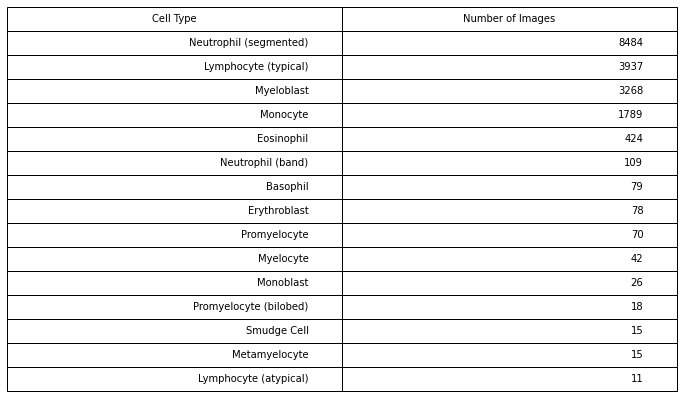

In [38]:
#Make table with full names and counts
table = plt.table(cellText = sorted_new_names, 
                      colLabels = ['Cell Type', 'Number of Images'],
                      loc='center')
plt.axis("off")
table.scale(2,2)
plt.show()

In [39]:
#combine full cell names annd abbreviations
dict_full_names = {}
for key,value in abbreviation_dict.items():
  dict_full_names[value + " (" + key + ")"] =  mydict[key]

In [40]:
#Sort full names dictionary 
sorted_full_names = sorted(dict_full_names.items(), key=lambda item: item[1], reverse = True)
sorted_full_names

[('Neutrophil (segmented) (NGS)', 8484),
 ('Lymphocyte (typical) (LYT)', 3937),
 ('Myeloblast (MYO)', 3268),
 ('Monocyte (MON)', 1789),
 ('Eosinophil (EOS)', 424),
 ('Neutrophil (band) (NGB)', 109),
 ('Basophil (BAS)', 79),
 ('Erythroblast (EBO)', 78),
 ('Promyelocyte (PMO)', 70),
 ('Myelocyte (MYB)', 42),
 ('Monoblast (MOB)', 26),
 ('Promyelocyte (bilobed) (PMB)', 18),
 ('Smudge Cell (KSC)', 15),
 ('Metamyelocyte (MMZ)', 15),
 ('Lymphocyte (atypical) (LYA)', 11)]

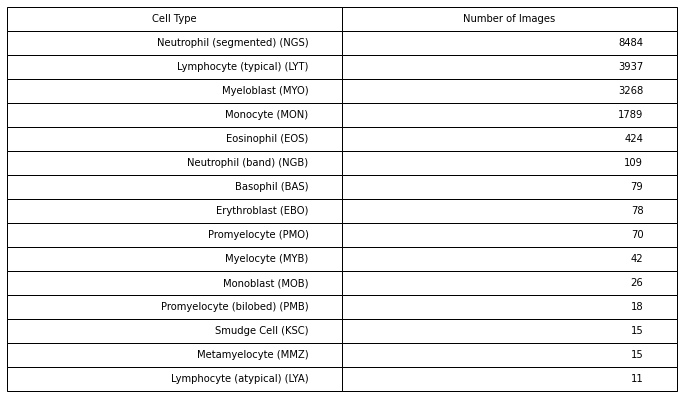

In [41]:
#Plot full names in table
table = plt.table(cellText = sorted_full_names, 
                      colLabels = ['Cell Type', 'Number of Images'],
                      loc='center')
plt.axis("off")
table.scale(2,2)
plt.show()

##Looking at Variance in Second Annotator and Second Annotator 11 Months Later


###Looking at Varianxe in Second Annotator with First Annotator

In [42]:
#Cells that were relabeled
relabeled_cells = labels[labels['label_2'].notna() == True]
relabeled_cells.reset_index(drop = True, inplace = True)
relabeled_cells

,filename,label_1,label_2,label_3,cell_type
0,BAS_0021.tiff,BAS,UNC,UNC,BAS
1,BAS_0026.tiff,BAS,BAS,BAS,BAS
2,BAS_0040.tiff,BAS,EOS,EOS,BAS
3,BAS_0052.tiff,BAS,BAS,BAS,BAS
4,BAS_0074.tiff,BAS,BAS,BAS,BAS
...,...,...,...,...,...
1900,PMO_0037.tiff,PMO,PMO,PMO,PMO
1901,PMO_0041.tiff,PMO,MYO,MYO,PMO
1902,PMO_0043.tiff,PMO,MYO,MYO,PMO
1903,PMO_0047.tiff,PMO,MYO,MYO,PMO


In [43]:
#Number of relabled cells by researcher two = 1,905
num_relabeled_cells = len(relabeled_cells)
num_relabeled_cells

1905

In [44]:
#Cells that researcher one and researcher two labeled differently
different_research_labels = relabeled_cells[relabeled_cells['label_1'] != relabeled_cells['label_2']]
different_research_labels.reset_index(drop = True, inplace = True)
different_research_labels

,filename,label_1,label_2,label_3,cell_type
0,BAS_0021.tiff,BAS,UNC,UNC,BAS
1,BAS_0040.tiff,BAS,EOS,EOS,BAS
2,EBO_0014.tiff,EBO,LYT,EBO,EBO
3,EBO_0027.tiff,EBO,UNC,EBO,EBO
4,EBO_0033.tiff,EBO,LYT,LYT,EBO
...,...,...,...,...,...
283,PMO_0012.tiff,PMO,MYO,MYO,PMO
284,PMO_0032.tiff,PMO,MYO,MYO,PMO
285,PMO_0041.tiff,PMO,MYO,MYO,PMO
286,PMO_0043.tiff,PMO,MYO,MYO,PMO


In [45]:
#Percent difference in newly labeled cells - about 15%
percent_researcher_difference = len(different_research_labels)/len(relabeled_cells)
percent_researcher_difference

0.15118110236220472

In [46]:
#Do a cell breakdown of what cells by the first researcher do not match those by the second researcher.
#Let's first look into researcher one's cells that don't match researchers two's. All EOS cells were classified the same!
unique_one_labels = np.unique(different_research_labels['label_1'])
#Let's now look into researcher two's cells to see which match and which don't. 
unique_two_labels = np.unique(different_research_labels['label_2'])
unique_two_labels

array(['BAS', 'EOS', 'LYT', 'MMZ', 'MON', 'MYB', 'MYO', 'NGB', 'NGS',
       'PMO', 'UNC'], dtype=object)

In [47]:
classes_dictionary_w_UNC = classes_dictionary
classes_dictionary_w_UNC[15] = 'UNC'
classes_dictionary_w_UNC

{0: 'BAS',
 1: 'EBO',
 2: 'EOS',
 3: 'KSC',
 4: 'LYA',
 5: 'LYT',
 6: 'MMZ',
 7: 'MOB',
 8: 'MON',
 9: 'MYB',
 10: 'MYO',
 11: 'NGB',
 12: 'NGS',
 13: 'PMB',
 14: 'PMO',
 15: 'UNC'}

/usr/local/lib/python3.7/dist-packages/scikitplot/metrics.py:124: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


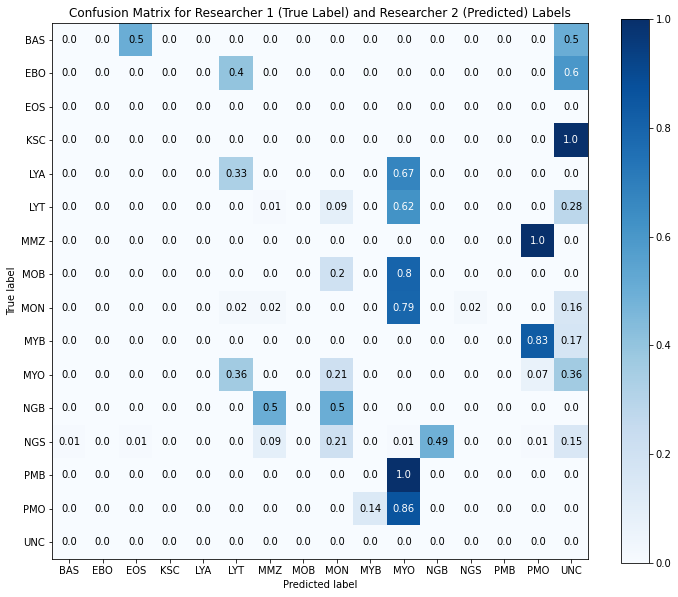

In [48]:
skplt.metrics.plot_confusion_matrix(
    different_research_labels['label_1'], 
    different_research_labels['label_2'],
    title = "Confusion Matrix for Researcher 1 (True Label) and Researcher 2 (Predicted) Labels",
    normalize=True,
    figsize=(12,10))

In [49]:
research_one_dif_dic =  {key: 0 for key in unique_one_labels}
for label in different_research_labels['label_1']:
  research_one_dif_dic[label] +=1 
research_one_dif_dic

{'BAS': 2,
 'EBO': 5,
 'KSC': 3,
 'LYA': 3,
 'LYT': 69,
 'MMZ': 2,
 'MOB': 5,
 'MON': 62,
 'MYB': 6,
 'MYO': 42,
 'NGB': 2,
 'NGS': 75,
 'PMB': 5,
 'PMO': 7}

In [50]:
#Sort abbreviations in descending order
sorted_research_one_dic = sorted(research_one_dif_dic.items(), key=lambda item: item[1], reverse = True)
sorted_research_one_dic

[('NGS', 75),
 ('LYT', 69),
 ('MON', 62),
 ('MYO', 42),
 ('PMO', 7),
 ('MYB', 6),
 ('EBO', 5),
 ('MOB', 5),
 ('PMB', 5),
 ('KSC', 3),
 ('LYA', 3),
 ('BAS', 2),
 ('MMZ', 2),
 ('NGB', 2)]

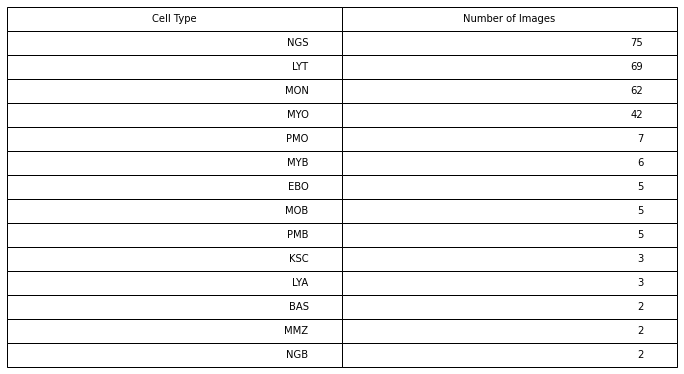

In [51]:
#Plot researcher one's different label counts in table
table = plt.table(cellText = sorted_research_one_dic, 
                      colLabels = ['Cell Type', 'Number of Images'],
                      loc='center')
plt.axis("off")
table.scale(2,2)
plt.show()

In [52]:
research_two_dif_dic =  {key: 0 for key in unique_two_labels}
for label in different_research_labels['label_2']:
  research_two_dif_dic[label] +=1 
research_two_dif_dic

{'BAS': 1,
 'EOS': 2,
 'LYT': 19,
 'MMZ': 10,
 'MON': 33,
 'MYB': 1,
 'MYO': 110,
 'NGB': 37,
 'NGS': 1,
 'PMO': 11,
 'UNC': 63}

In [53]:
different_research_labels[different_research_labels['label_1'] == 'PMB']

,filename,label_1,label_2,label_3,cell_type
276,PMB_0001.tiff,PMB,MYO,PMB,PMB
277,PMB_0002.tiff,PMB,MYO,UNC,PMB
278,PMB_0011.tiff,PMB,MYO,MYO,PMB
279,PMB_0013.tiff,PMB,MYO,MYO,PMB
280,PMB_0014.tiff,PMB,MYO,MYO,PMB


###Looking at Second Annnotator Labels and Second Annotator's Labels 11 Months Later

In [54]:
#Make sure all relabled cells are reannotated by the second labeler. They are.
relabeled_cells[relabeled_cells['label_3'].isna() == True]

,filename,label_1,label_2,label_3,cell_type


In [55]:
#Find annotated cells that were annotated differently the second time by the second annotator
diff_two_relabeled = relabeled_cells[relabeled_cells['label_2'] != relabeled_cells['label_3']]
diff_two_relabeled.reset_index(drop = True,inplace = True)
diff_two_relabeled

,filename,label_1,label_2,label_3,cell_type
0,EBO_0014.tiff,EBO,LYT,EBO,EBO
1,EBO_0027.tiff,EBO,UNC,EBO,EBO
2,EBO_0050.tiff,EBO,EBO,UNC,EBO
3,EBO_0057.tiff,EBO,UNC,EBO,EBO
4,EBO_0060.tiff,EBO,UNC,EBO,EBO
...,...,...,...,...,...
332,NGS_8418.tiff,NGS,BAS,NGS,NGS
333,PMB_0001.tiff,PMB,MYO,PMB,PMB
334,PMB_0002.tiff,PMB,MYO,UNC,PMB
335,PMO_0022.tiff,PMO,PMO,MMZ,PMO


In [56]:
#Percent difference among second labeler first annotations and second annotations - about 18%. 
diff_two_percent = len(diff_two_relabeled)/len(relabeled_cells)
diff_two_percent

0.17690288713910762

/usr/local/lib/python3.7/dist-packages/scikitplot/metrics.py:124: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


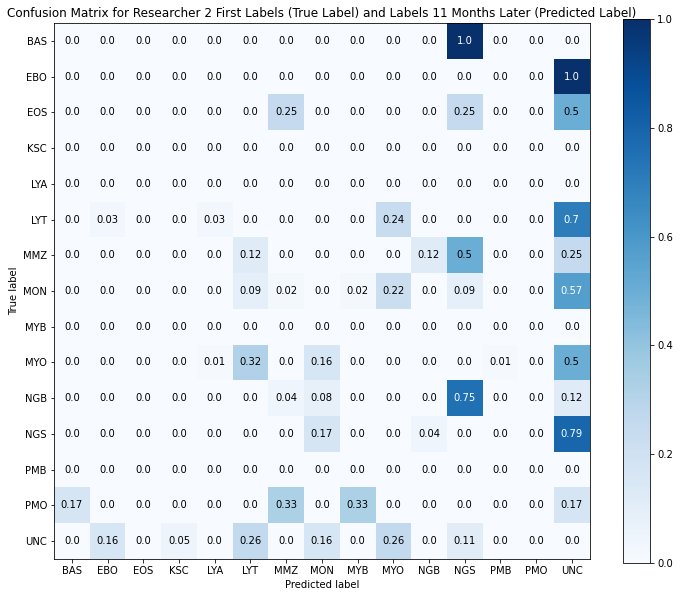

In [57]:
#Plot confusion matrix for different cells
skplt.metrics.plot_confusion_matrix(
    diff_two_relabeled['label_2'], 
    diff_two_relabeled['label_3'],
    title = "Confusion Matrix for Researcher 2 First Labels (True Label) and Labels 11 Months Later (Predicted Label)",
    normalize=True,
    figsize=(12,10))

In [58]:
diff_two_relabeled[diff_two_relabeled['label_3'] == 'UNC']

,filename,label_1,label_2,label_3,cell_type
2,EBO_0050.tiff,EBO,EBO,UNC,EBO
6,EOS_0068.tiff,EOS,EOS,UNC,EOS
7,EOS_0098.tiff,EOS,EOS,UNC,EOS
12,LYT_0019.tiff,LYT,LYT,UNC,LYT
13,LYT_0042.tiff,LYT,LYT,UNC,LYT
...,...,...,...,...,...
322,NGS_6770.tiff,NGS,NGS,UNC,NGS
325,NGS_7586.tiff,NGS,MMZ,UNC,NGS
326,NGS_7763.tiff,NGS,NGS,UNC,NGS
327,NGS_8219.tiff,NGS,NGS,UNC,NGS
